# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src
import sys
sys.path.append('./')

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02','03','04']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)
df_yellow_v2=pd.concat(df_yellow_list)
df_green_v2=pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [3]:
df_yellow.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


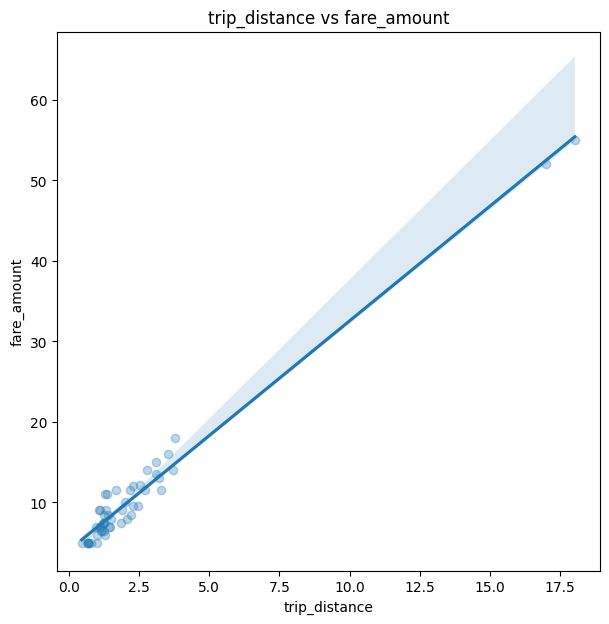

In [5]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

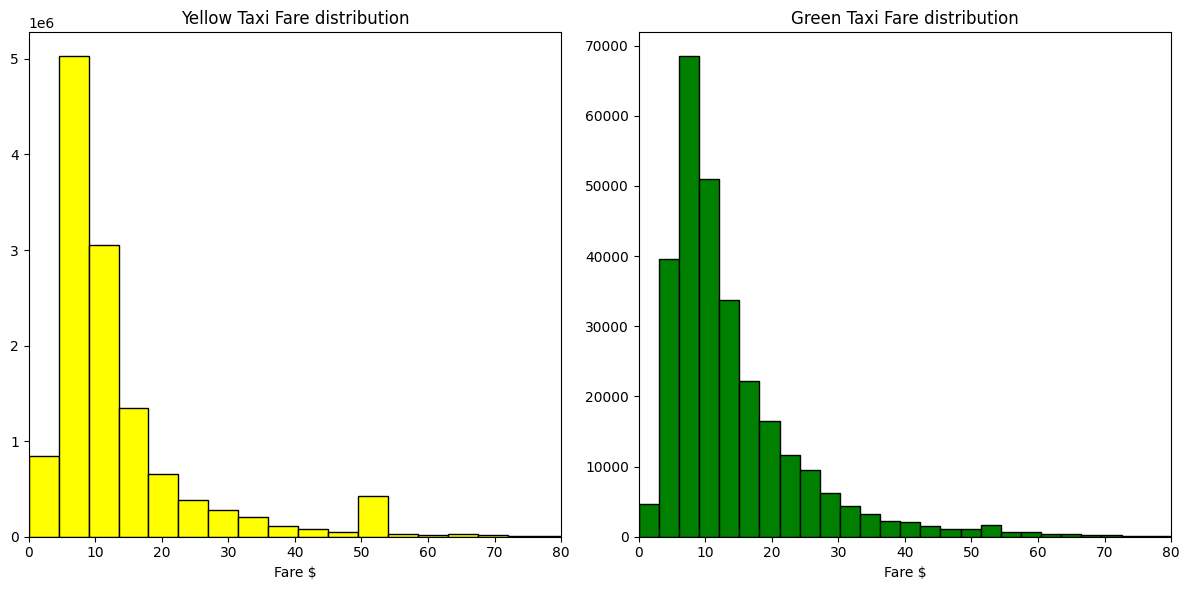

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for df_yellow
df_yellow_filtered = df_yellow[(df_yellow["fare_amount"] <= 1000) & (df_yellow["fare_amount"] > 0) & (df_yellow["trip_distance"] <= 1000)]

# Filter the data for df_green
df_green_filtered = df_green[(df_green["fare_amount"] <= 1000) & (df_green["fare_amount"] > 0) & (df_green["trip_distance"] <= 1000)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for df_yellow
axs[0].hist(df_yellow_filtered["fare_amount"], bins=200, color="yellow", edgecolor='black')
axs[0].set_xlim(0, 80)
axs[0].set_title("Yellow Taxi Fare distribution")
axs[0].set_xlabel("Fare $")
axs[0].set_xticks(range(0, 90, 10))

# Plot for df_green
axs[1].hist(df_green_filtered["fare_amount"], bins=200, color="green", edgecolor='black')
axs[1].set_xlim(0, 80)
axs[1].set_title("Green Taxi Fare distribution")
axs[1].set_xlabel("Fare $")
axs[1].set_xticks(range(0, 90, 10))
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

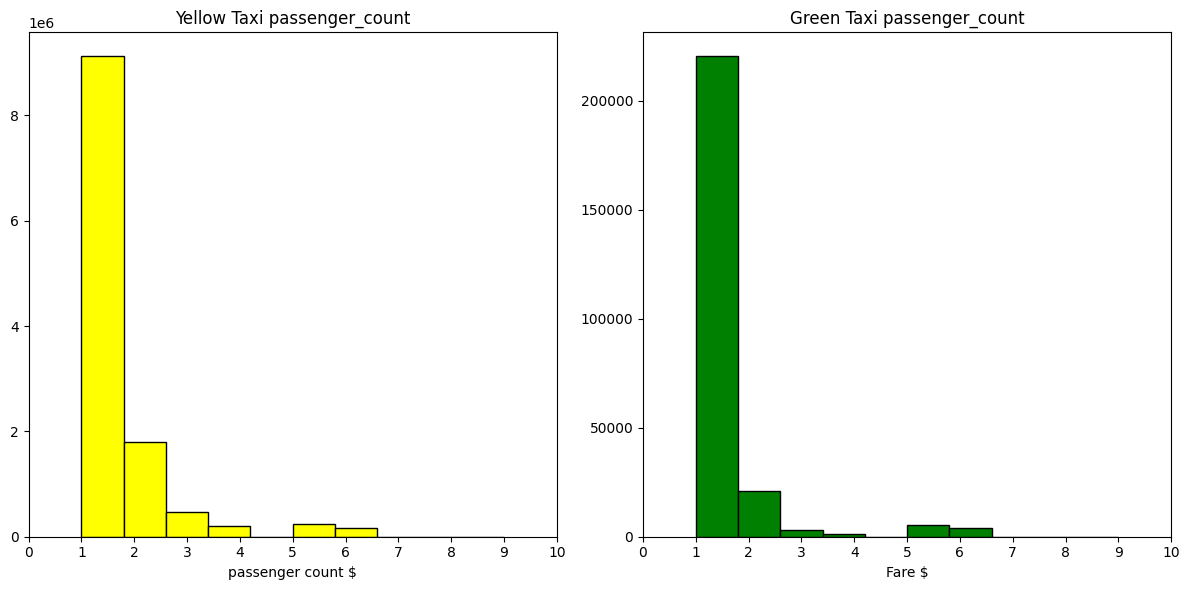

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for df_yellow
df_yellow_filtered = df_yellow[(df_yellow["passenger_count"] <= 10) & (df_yellow["passenger_count"] > 0) & (df_yellow["passenger_count"] <= 10)]

# Filter the data for df_green
df_green_filtered = df_green[(df_green["passenger_count"] <= 10) & (df_green["passenger_count"] > 0) & (df_green["passenger_count"] <= 10)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for df_yellow
axs[0].hist(df_yellow_filtered["passenger_count"], bins=10, color="yellow", edgecolor='black')
axs[0].set_xlim(0, 10)
axs[0].set_title("Yellow Taxi passenger_count")
axs[0].set_xlabel("passenger count $")
axs[0].set_xticks(range(0, 11, 1))

# Plot for df_green
axs[1].hist(df_green_filtered["passenger_count"], bins=10, color="green", edgecolor='black')
axs[1].set_xlim(0, 10)
axs[1].set_title("Green Taxi passenger_count")
axs[1].set_xlabel("Fare $")
axs[1].set_xticks(range(0, 11, 1))
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

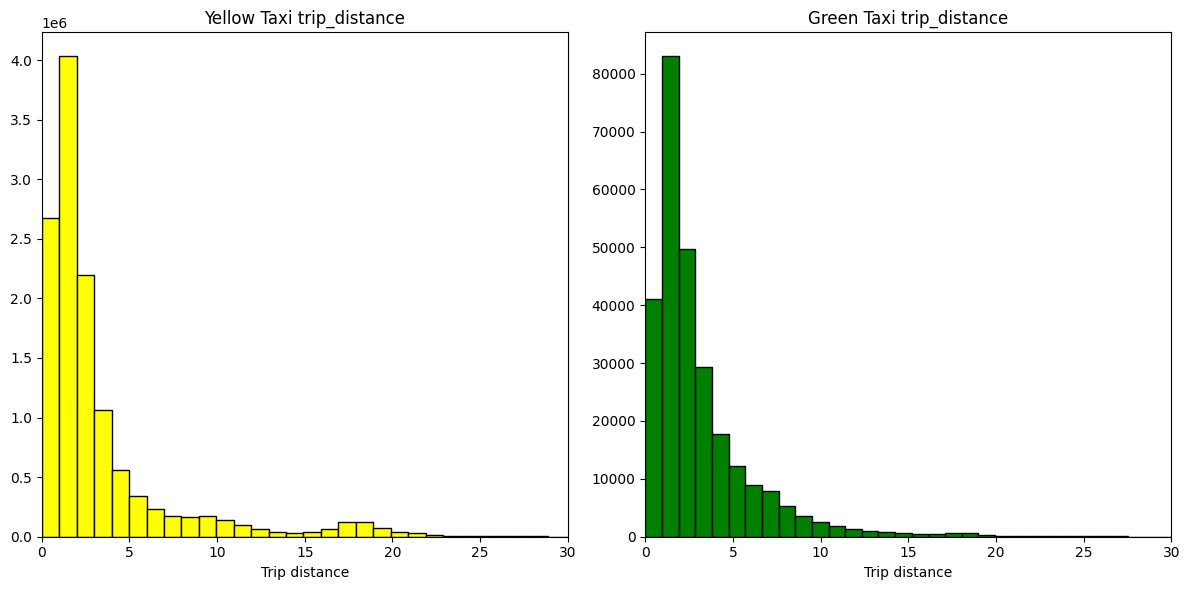

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for df_yellow
df_yellow_filtered = df_yellow[(df_yellow["trip_distance"] <= 100) & (df_yellow["trip_distance"] > 0) & (df_yellow["trip_distance"] <= 100)]

# Filter the data for df_green
df_green_filtered = df_green[(df_green["trip_distance"] <= 100) & (df_green["trip_distance"] > 0) & (df_green["trip_distance"] <= 100)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for df_yellow
axs[0].hist(df_yellow_filtered["trip_distance"], bins=100, color="yellow", edgecolor='black')
axs[0].set_xlim(0, 30)
axs[0].set_title("Yellow Taxi trip_distance")
axs[0].set_xlabel("Trip distance")
axs[0].set_xticks(range(0, 31, 5))

# Plot for df_green
axs[1].hist(df_green_filtered["trip_distance"], bins=100, color="green", edgecolor='black')
axs[1].set_xlim(0, 30)
axs[1].set_title("Green Taxi trip_distance")
axs[1].set_xlabel("Trip distance")
axs[1].set_xticks(range(0, 31, 5))
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

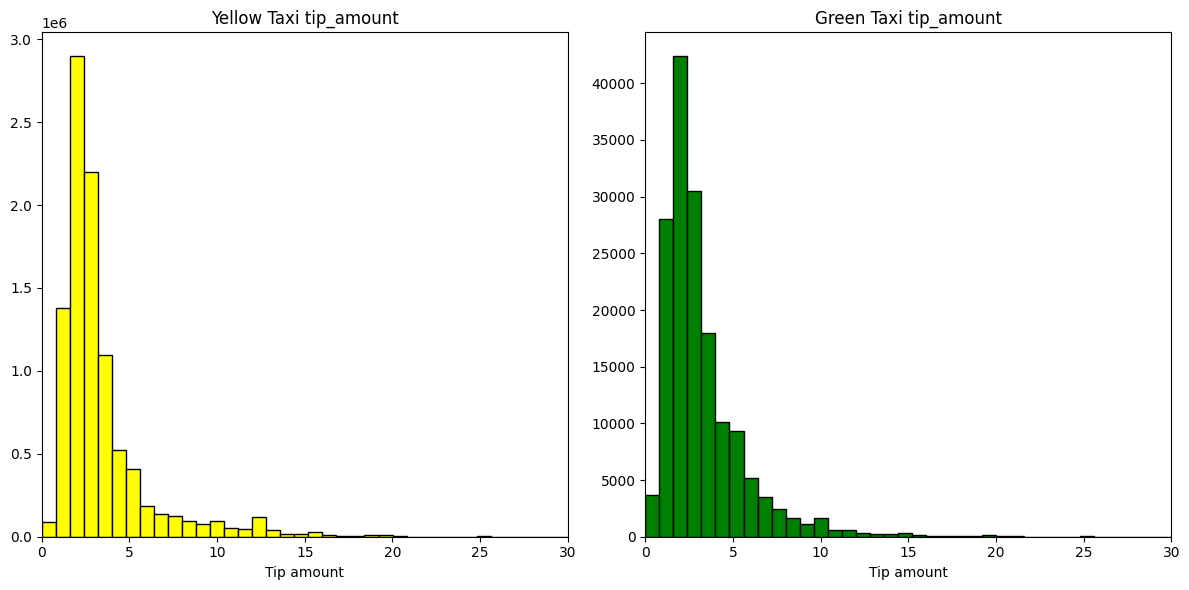

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for df_yellow
df_yellow_filtered = df_yellow[(df_yellow["tip_amount"] <= 40) & (df_yellow["tip_amount"] > 0) & (df_yellow["tip_amount"] <= 40)]

# Filter the data for df_green
df_green_filtered = df_green[(df_green["tip_amount"] <= 40) & (df_green["tip_amount"] > 0) & (df_green["tip_amount"] <= 40)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for df_yellow
axs[0].hist(df_yellow_filtered["tip_amount"], bins=50, color="yellow", edgecolor='black')
axs[0].set_xlim(0, 30)
axs[0].set_title("Yellow Taxi tip_amount")
axs[0].set_xlabel("Tip amount")
axs[0].set_xticks(range(0, 31, 5))

# Plot for df_green
axs[1].hist(df_green_filtered["tip_amount"], bins=50, color="green", edgecolor='black')
axs[1].set_xlim(0, 30)
axs[1].set_title("Green Taxi tip_amount")
axs[1].set_xlabel("Tip amount")
axs[1].set_xticks(range(0, 31, 5))
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

- #### The relationship between trip distance and trip duration

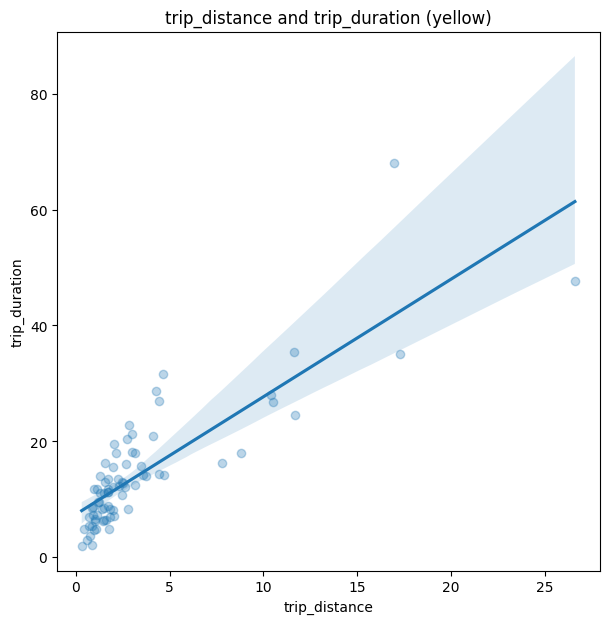

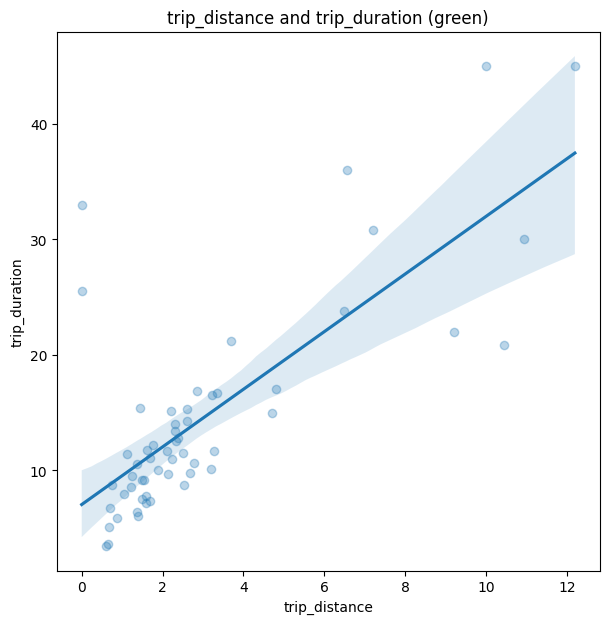

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# convert to dt
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

df_yellow['trip_duration'] = ((df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds())/60
df_green['trip_duration'] = ((df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds())/60

dfs=[df_yellow,df_green]
colors = ['yellow', 'green']

for i in range(len(dfs)):
    x = dfs[i]
    color = colors[i]
    x_fil = x.sample(100)
    x_fil=x_fil[x_fil.trip_duration < 120]
    x_fil=x_fil[x_fil.trip_distance < 100]
    x_fil=x_fil[x_fil.tip_amount>0]
    
    create_scatterplot(
    x_fil, 
    x_col = 'trip_distance', 
    y_col = 'trip_duration', 
    title = f'trip_distance and trip_duration ({color})', 
    xlabel = 'trip_distance',
    ylabel = 'trip_duration',
    )

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [11]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


* First, we merge the Yellow taxi dataset (df_yellow) with another dataset called df_zones based on pickup and drop-off location IDs. This merging operation combines information from both datasets, specifically the latitude and longitude coordinates of the pickup and drop-off locations. We perform a similar merging operation for the Green taxi dataset, using the df_green dataset and df_zones.

* Next, we convert the datetime columns in the Yellow taxi dataset (tpep_dropoff_datetime and tpep_pickup_datetime) into datetime objects. This conversion enables easier manipulation and analysis of the temporal data. Similarly, we convert the datetime columns in the Green taxi dataset (lpep_dropoff_datetime and lpep_pickup_datetime) into datetime objects.

* To facilitate further analysis or testing, we sample 100,000 rows from both the Yellow taxi dataset and the Green taxi dataset. These random samples allow us to work with smaller subsets of the data, which can be more manageable and efficient for analysis.

* Finally, we print the resulting sample dataframes for the Yellow and Green taxis. This allows us to visually inspect the randomly selected 100,000 rows from each dataset and gain an overview of the sampled data.

In summary, the code performs data merging, datetime conversion, and data sampling to prepare subsets of the Yellow and Green taxi datasets for further analysis or exploration.

In [12]:
# Merging data for Yellow taxis
Yellow_taxi_kepler = df_yellow.merge(df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID')
Yellow_taxi_kepler = Yellow_taxi_kepler.merge(df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', suffixes=('_DO', '_PU'))

# Convert the DO and PU datetime columns to datetime objects
Yellow_taxi_kepler['tpep_dropoff_datetime'] = pd.to_datetime(Yellow_taxi_kepler['tpep_dropoff_datetime'])
Yellow_taxi_kepler['tpep_pickup_datetime'] = pd.to_datetime(Yellow_taxi_kepler['tpep_pickup_datetime'])

# Create a combined timestamp column for DO and PU times
Yellow_taxi_kepler['timestamp'] = Yellow_taxi_kepler['tpep_dropoff_datetime'].astype(str) + ' - ' + Yellow_taxi_kepler['tpep_pickup_datetime'].astype(str)

# Merging data for Green taxis
Green_taxi_kepler = df_green.merge(df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID')
Green_taxi_kepler = Green_taxi_kepler.merge(df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', suffixes=('_DO', '_PU'))

# Convert the DO and PU datetime columns to datetime objects
Green_taxi_kepler['tpep_dropoff_datetime'] = pd.to_datetime(Green_taxi_kepler['lpep_dropoff_datetime'])
Green_taxi_kepler['tpep_pickup_datetime'] = pd.to_datetime(Green_taxi_kepler['lpep_pickup_datetime'])

# Create a combined timestamp column for DO and PU times
Green_taxi_kepler['timestamp'] = Green_taxi_kepler['tpep_dropoff_datetime'].astype(str) + ' - ' + Green_taxi_kepler['tpep_pickup_datetime'].astype(str)

# Sampling 100,000 rows from the Yellow_taxi_kepler dataframe
Yellow_taxi_sample = Yellow_taxi_kepler.sample(n=100000)

# Sampling 100,000 rows from the Green_taxi_kepler dataframe
Green_taxi_sample = Green_taxi_kepler.sample(n=100000)

# Printing the resulting sample dataframes
#print("Yellow Taxi Sample Data (100,000 rows):")
#print(Yellow_taxi_sample)

#print("\nGreen Taxi Sample Data (100,000 rows):")
#print(Green_taxi_sample)


First, the code imports the necessary libraries, including pandas for working with dataframes and KeplerGl for interactive map visualizations.

Next, it loads two CSV files, namely 'yellow_taxi_sample.csv' and 'green_taxi_sample.csv', into pandas dataframes named yellow_taxi_sample and green_taxi_sample, respectively.

Then, it initializes a KeplerGl map object called map_1 with a height of 600 pixels.

The code adds the yellow_taxi_sample dataframe as a new layer to the KeplerGl map using the add_data method. This layer is named 'Yellow Taxi'.

Similarly, it adds the green_taxi_sample dataframe as another layer to the KeplerGl map, also using the add_data method. This layer is named 'Green Taxi'.

Finally, the code displays the KeplerGl map, showing the added layers. This interactive visualization allows users to explore and analyze the yellow and green taxi data spatially.

To summarize, the code loads CSV files into pandas dataframes, initializes a KeplerGl map, adds the yellow and green taxi data as separate layers to the map, and displays the resulting visualization. The KeplerGl map provides an interactive way to visually explore and analyze the taxi data in a spatial context.

In [13]:
import pandas as pd
from keplergl import KeplerGl

# Load the CSV files into pandas dataframes
yellow_taxi_sample = pd.read_csv('yellow_taxi_sample.csv')
green_taxi_sample = pd.read_csv('green_taxi_sample.csv')

# Initialize KeplerGl with a map visualization
map_1 = KeplerGl(height=600)

# Add the yellow taxi data as a new layer
map_1.add_data(data=yellow_taxi_sample, name='Yellow Taxi')

# Add the green taxi data as a new layer
map_1.add_data(data=green_taxi_sample, name='Green Taxi')

# Display the map
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
c:\Users\salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'Yellow Taxi': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

Kepler.gl has been used to create the spatial maps. Since the map couldn't be initialized with the overlays we had created saved, we built them on keplers website instead. The maps were saved as CSV files, added to Kepler's website, and from there we developed a link that will open in your default browser load the 2 datasets, and our created overlays.

Upon starting the map, you will see the 2 datasets, and 8 overlays. 4 for each dataset, where 2 of them are just pointers for PickUp and DropOff, while the other 2 are cluster overlays for density of pickups and dropoffs.

The link is provided below:

In [14]:
import webbrowser

def open_url(url):
    webbrowser.open(url)

open_url("https://kepler.gl/demo/map?mapUrl=https://dl.dropboxusercontent.com/s/ghf3gn2fjca6gk2/keplergl_to1ydbd.json")

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [15]:
import pandas as pd
import datetime

# Convert the date columns to datetime objects
df_yellow["tpep_pickup_datetime"] = pd.to_datetime(df_yellow["tpep_pickup_datetime"])

# Hours of the day
df_yellow["hours"] = df_yellow["tpep_pickup_datetime"].dt.hour

# Day of the week
df_yellow["day_of_week"] = df_yellow["tpep_pickup_datetime"].dt.dayofweek

# Month of the year
df_yellow["month"] = df_yellow["tpep_pickup_datetime"].dt.month

# Map the day of the week to weekday names
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_yellow["day_of_week"] = df_yellow["day_of_week"].map(lambda x: weekday_names[x])


# Print the updated dataset
df_yellow.head(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,hours,day_of_week,month
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,0,Saturday,1
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,0,Saturday,1
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,0,Saturday,1
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,0,Saturday,1
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,0,Saturday,1


In [16]:

#df_yellow = df_yellow.value_counts(subset=['hours']).reset_index(name='count')
hours_counts = df_yellow["hours"].value_counts()
len(df_yellow)

#print(hours_counts)
#df_yellow.head(5)

12671164

In [17]:
import pandas as pd
import datetime

# Convert the date columns to datetime objects
df_green["lpep_pickup_datetime"] = pd.to_datetime(df_green["lpep_pickup_datetime"])

# Hours of the day
df_green["hours"] = df_green["lpep_pickup_datetime"].dt.hour

# Day of the week
df_green["day_of_week"] = df_green["lpep_pickup_datetime"].dt.dayofweek

# Month of the year
df_green["month"] = df_green["lpep_pickup_datetime"].dt.month

# Map the day of the week to weekday names
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_green["day_of_week"] = df_green["day_of_week"].map(lambda x: weekday_names[x])


# Print the updated dataset
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,hours,day_of_week,month
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,None,0.3,4.80,2.0,1.0,0.00,1.200000,0,Saturday,1
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,None,0.3,10.80,2.0,1.0,0.00,8.716667,0,Saturday,1
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,None,0.3,23.15,1.0,1.0,2.75,16.200000,0,Saturday,1
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,None,0.3,9.30,2.0,1.0,0.00,8.250000,0,Saturday,1
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,None,0.3,31.26,1.0,1.0,2.75,21.033333,0,Saturday,1


#### Code down bellow creates a bar chart that compares the number of rides by hour for yellow taxis and green taxis. It uses data from two dataframes, groups the rides by hour, and sorts them. The bar chart is displayed using Matplotlib, with each bar assigned a unique color.

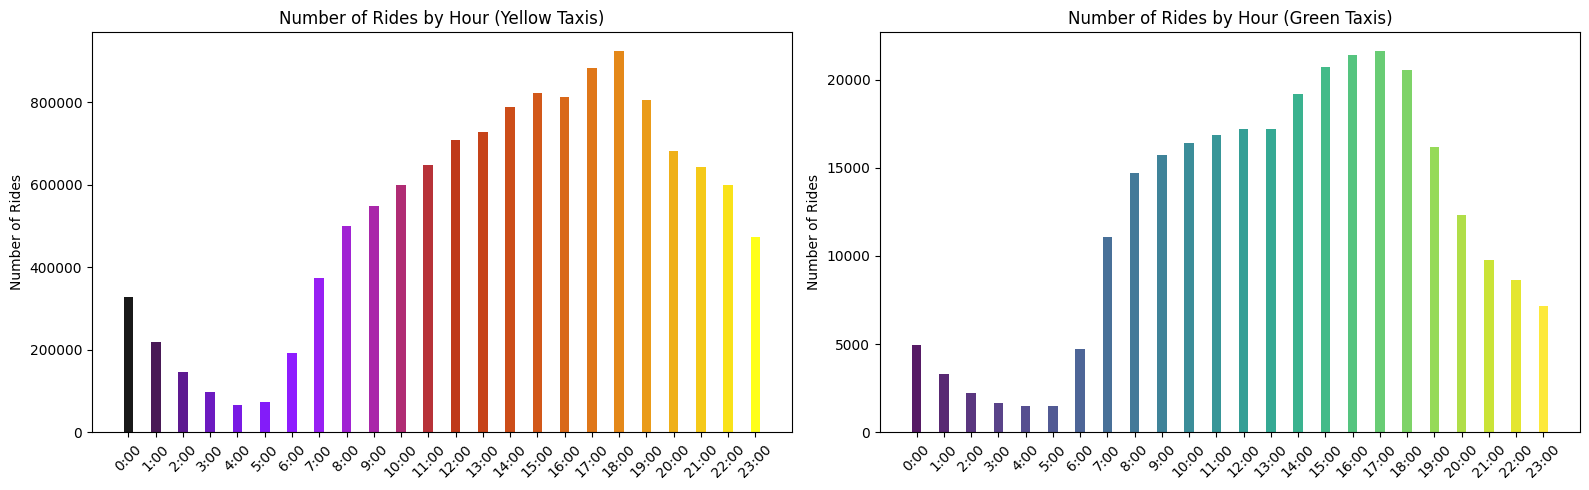

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the count of rides by hour for yellow taxis and sort by hour
ride_count_by_hour_yellow = df_yellow.groupby("hours").size().sort_index()

# Calculate the count of rides by hour for green taxis and sort by hour
ride_count_by_hour_green = df_green.groupby("hours").size().sort_index()

# Set the x-axis values for the bar chart
hours = range(24)

# Set the width of each bar
bar_width = 0.35

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Assign a unique color to each bar for yellow taxis
colors = plt.cm.gnuplot(np.linspace(0, 1, len(ride_count_by_hour_yellow)))
ax1.bar(hours, ride_count_by_hour_yellow, width=bar_width, color=colors, alpha=0.9)

# Set the x-axis labels for yellow taxis
ax1.set_xticks(hours)
ax1.set_xticklabels([str(hour) + ":00" for hour in hours], rotation=45)

# Set the y-axis label for yellow taxis
ax1.set_ylabel('Number of Rides')

# Set the plot title for yellow taxis
ax1.set_title('Number of Rides by Hour (Yellow Taxis)')

# Assign a unique color to each bar for green taxis
colors1 = plt.cm.viridis(np.linspace(0, 1, len(ride_count_by_hour_green)))
ax2.bar(hours, ride_count_by_hour_green, width=bar_width, color=colors1, alpha=0.9)

# Set the x-axis labels for green taxis
ax2.set_xticks(hours)
ax2.set_xticklabels([str(hour) + ":00" for hour in hours], rotation=45)

# Set the y-axis label for green taxis
ax2.set_ylabel('Number of Rides')

# Set the plot title for green taxis
ax2.set_title('Number of Rides by Hour (Green Taxis)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



#### This code creates a bar chart that compares the number of rides by day of the week for yellow taxis and green taxis. It calculates the ride counts for each day of the week from the respective dataframes and sorts them.

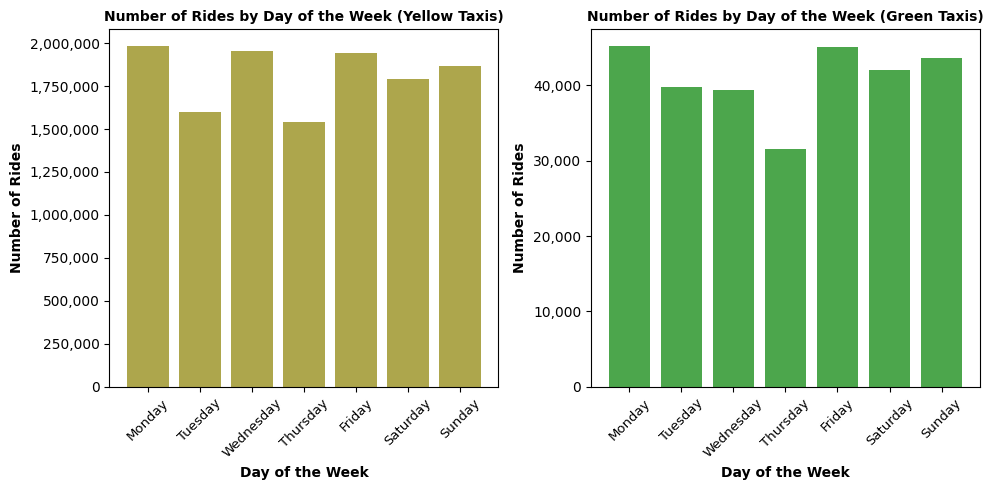

In [19]:
import matplotlib.ticker as ticker
# Calculate the count of rides by day of the week for yellow taxis
ride_count_by_day_yellow = df_yellow["day_of_week"].value_counts().sort_index()

# Calculate the count of rides by day of the week for green taxis
ride_count_by_day_green = df_green["day_of_week"].value_counts().sort_index()

# Define the weekday names
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


# Plot for yellow taxis
ax1.bar(weekday_names, ride_count_by_day_yellow, color='#8B8000', alpha=0.7)
ax1.set_xlabel('Day of the Week', fontsize=10, fontweight='bold')
ax1.set_ylabel('Number of Rides', fontsize=10, fontweight='bold')
ax1.set_title('Number of Rides by Day of the Week (Yellow Taxis)', fontsize=10, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=9.5)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels

# Plot for green taxis
ax2.bar(weekday_names, ride_count_by_day_green, color='green', alpha=0.7)
ax2.set_xlabel('Day of the Week', fontsize=10, fontweight='bold')
ax2.set_ylabel('Number of Rides', fontsize=10, fontweight='bold')
ax2.set_title('Number of Rides by Day of the Week (Green Taxis)',fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=9.5)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


#### This code analyzes and visualizes average trip distance by time period for yellow and green taxis, providing insights into variations in trip distance throughout the day.


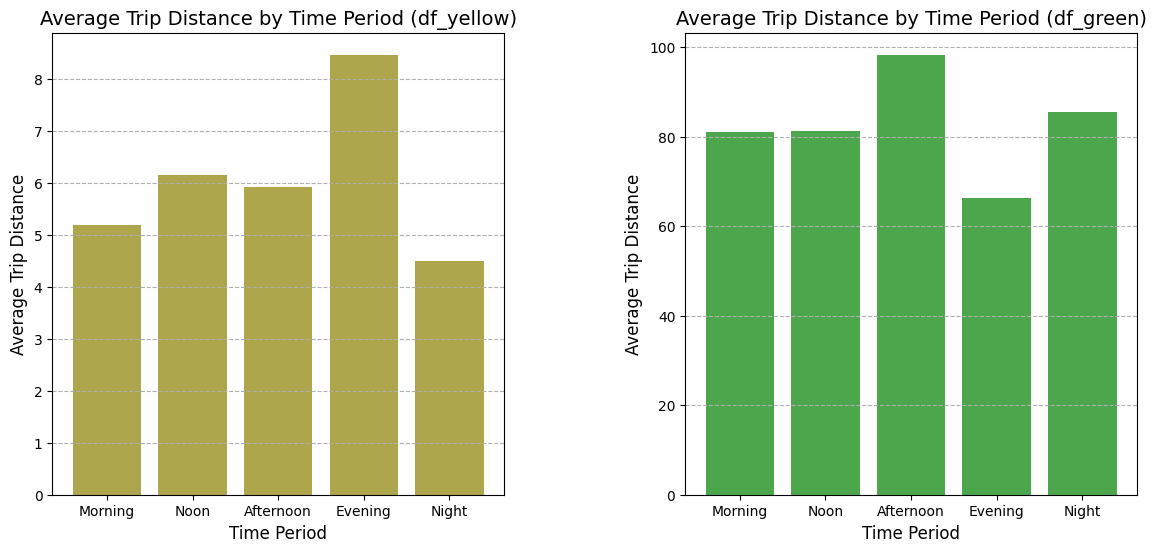

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract hour component
df_yellow['pickup_hour'] = pd.to_datetime(df_yellow['tpep_pickup_datetime']).dt.hour
df_green['pickup_hour'] = pd.to_datetime(df_green['lpep_pickup_datetime']).dt.hour

my_2_dataset = [df_yellow, df_green]





values = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night']

for x in my_2_dataset:
    conditions = [
            (x['pickup_hour'] >= 6) & (x['pickup_hour'] < 9),
            (x['pickup_hour'] >= 9) & (x['pickup_hour'] < 12),
            (x['pickup_hour'] >= 12) & (x['pickup_hour'] < 18),
            (x['pickup_hour'] >= 18) & (x['pickup_hour'] < 24),
            (x['pickup_hour'] >= 0) & (x['pickup_hour'] < 6)
        ]
    x['TimePeriod'] = pd.Series(np.select(conditions, values))
    


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average trip distance for each time period
avg_trip_distance_yellow = df_yellow.groupby('TimePeriod')['trip_distance'].mean()
ax1.set_title('Average Trip Distance by Time Period (df_yellow)', fontsize=14)
ax1.bar(values, avg_trip_distance_yellow, color='#8B8000', alpha=0.7)
ax1.set_xlabel('Time Period', fontsize=12)
ax1.set_ylabel('Average Trip Distance', fontsize=12)
ax1.grid(axis='y', linestyle='--')

# Plot for df_green
ax2.set_title('Average Trip Distance by Time Period (df_green)', fontsize=14)
# Calculate average trip distance for each time period
avg_trip_distance_green = df_green.groupby('TimePeriod')['trip_distance'].mean()

# Plot the bar chart for df_green
ax2.bar(values, avg_trip_distance_green, color='green', alpha=0.7)
ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('Average Trip Distance', fontsize=12)
ax2.grid(axis='y', linestyle='--')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()


#### The purpose of this code is to analyze and visualize the relationship between the hour of the day and the average fare amount for yellow taxis and green taxis. It extracts the pickup hour from the datasets, calculates the average fare per hour for both taxi types, and plots the average fare amounts as line charts. The resulting plot helps understand how the fare amounts vary throughout the day for different taxi types.

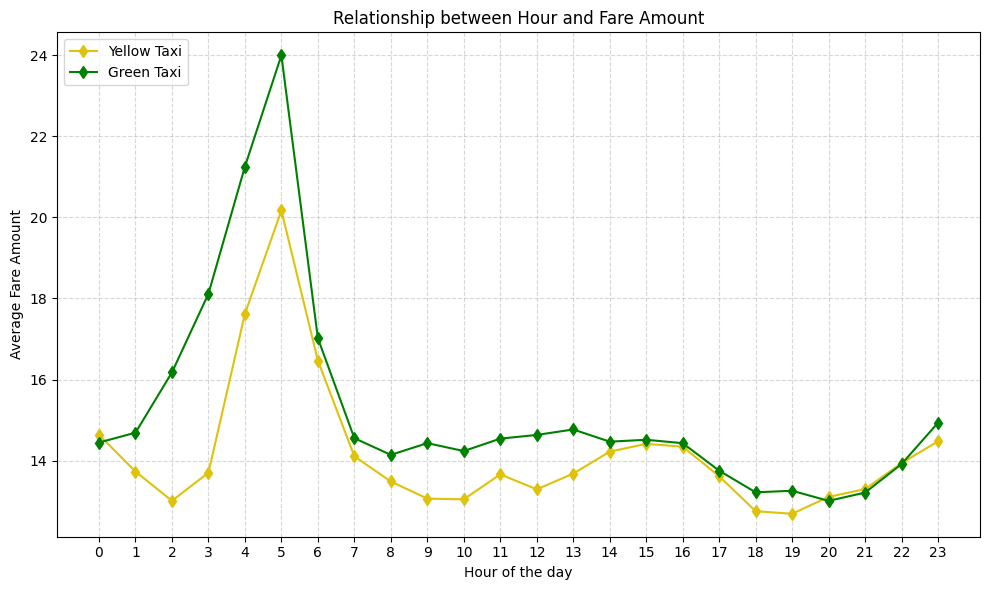

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract hour component
df_yellow['Hour'] = pd.to_datetime(df_yellow['tpep_pickup_datetime']).dt.hour
df_green['Hour'] = pd.to_datetime(df_green['lpep_pickup_datetime']).dt.hour

# Step 2: Calculate average fare per hour for both datasets
average_fare_by_hour_yellow = df_yellow.groupby('Hour')['fare_amount'].mean()
average_fare_by_hour_green = df_green.groupby('Hour')['fare_amount'].mean()

# Step 3: Configure and plot the figure
plt.figure(figsize=(10, 6))

# Plot line for Yellow Taxi
plt.plot(average_fare_by_hour_yellow.index, average_fare_by_hour_yellow,
        marker='d', label='Yellow Taxi', color='#DEC20B')

# Plot line for Green Taxi
plt.plot(average_fare_by_hour_green.index, average_fare_by_hour_green,
        marker='d', label='Green Taxi', color='green')

# Set x-axis and y-axis labels
plt.xlabel('Hour of the day')
plt.ylabel('Average Fare Amount')

# Set the title
plt.title('Relationship between Hour and Fare Amount')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the legend
plt.legend(loc='upper left')

# Set x-ticks to show all hours
plt.xticks(range(24))
# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

#### The purpose of this code is to analyze and visualize the relationship between the day of the week and the average fare amount for yellow taxis and green taxis. It converts the 'day_of_week' column to a categorical variable with a specified order. Then, it calculates the average fare per day of the week for both taxi types and plots the average fare amounts as line charts. 

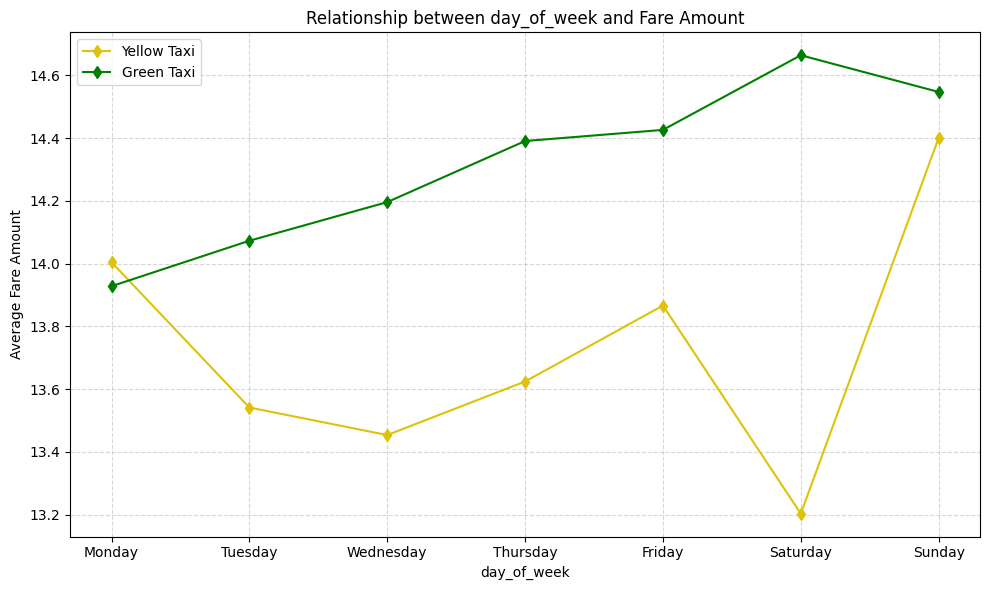

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Step 2: Convert 'day_of_week' column to categorical with the desired order
df_yellow['day_of_week'] = pd.Categorical(df_yellow['day_of_week'], categories=weekdays_order, ordered=True)
df_green['day_of_week'] = pd.Categorical(df_green['day_of_week'], categories=weekdays_order, ordered=True)


# Step 2: Calculate average fare per hour for both datasets
average_fare_by_day_of_week_yellow = df_yellow.groupby('day_of_week')['fare_amount'].mean()
average_fare_by_day_of_week_green = df_green.groupby('day_of_week')['fare_amount'].mean()

# Step 3: Configure and plot the figure
plt.figure(figsize=(10, 6))

# Plot line for Yellow Taxi
plt.plot(average_fare_by_day_of_week_yellow.index, average_fare_by_day_of_week_yellow,
        marker='d', label='Yellow Taxi', color='#DEC20B')

# Plot line for Green Taxi
plt.plot(average_fare_by_day_of_week_green.index, average_fare_by_day_of_week_green,
        marker='d', label='Green Taxi', color='green')

# Set x-axis and y-axis labels
plt.xlabel('day_of_week')
plt.ylabel('Average Fare Amount')

# Set the title
plt.title('Relationship between day_of_week and Fare Amount')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the legend
plt.legend(loc='upper left')


# Adjust spacing
plt.tight_layout()

# Display the plot
plt.show()

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

<font color=green >________________________________________________________________________________________________________________________________________________________________________________________________________________</font>

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [23]:
import pandas as pd
from prophet import Prophet





df_prophet_yellow = df_yellow_v2[['tpep_pickup_datetime', 'trip_distance']].copy()

df_prophet_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_prophet_yellow['tpep_pickup_datetime']).dt.date


df_prophet_yellow = df_prophet_yellow.groupby('tpep_pickup_datetime').size().reset_index(name='trips_numbers')


df_prophet_yellow = df_prophet_yellow.rename(columns={'tpep_pickup_datetime': 'ds', 'trips_numbers': 'y'})

df_prophet_yellow = df_prophet_yellow[pd.to_datetime(df_prophet_yellow['ds']).dt.year == 2022].reset_index(drop = True)
df_prophet_yellow = df_prophet_yellow[df_prophet_yellow['ds'].apply(lambda x: x.month in [1,2,3,4])].reset_index(drop=True)

df_prophet_yellow.head(100)


yellow_model = Prophet(interval_width= 0.95)

yellow_model.fit(df_prophet_yellow)

future_dates = yellow_model.make_future_dataframe(periods=220,include_history=True)

future_dates

forecast = yellow_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

#yellow_model.plot(forecast, uncertainty = True)

16:01:21 - cmdstanpy - INFO - Chain [1] start processing
16:01:22 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,74569.666787,60231.312545,89554.586994
1,2022-01-02,57755.660550,42318.318686,71937.121234
2,2022-01-03,61711.288824,47253.562453,76848.129900
3,2022-01-04,73230.326627,58344.685132,88855.055250
4,2022-01-05,77837.109278,64237.462892,92894.595982


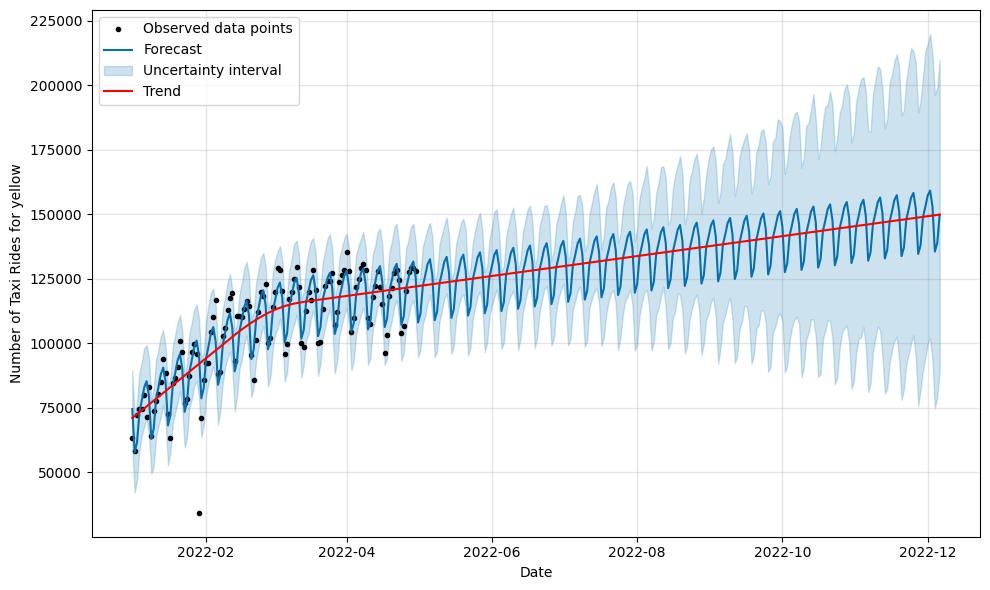

In [24]:
yellow_model.plot(forecast, xlabel='Date', ylabel='Number of Taxi Rides for yellow')
plt.plot(forecast['ds'], forecast['trend'], color='red', label='Trend')
plt.legend(loc='upper left')
plt.show()

In [25]:
df_prophet_green = df_green_v2[['lpep_pickup_datetime', 'trip_distance']].copy()

df_prophet_green['lpep_pickup_datetime'] = pd.to_datetime(df_prophet_green['lpep_pickup_datetime']).dt.date


df_prophet_green = df_prophet_green.groupby('lpep_pickup_datetime').size().reset_index(name='trips_numbers')


df_prophet_green = df_prophet_green.rename(columns={'lpep_pickup_datetime': 'ds', 'trips_numbers': 'y'})

df_prophet_green = df_prophet_green[pd.to_datetime(df_prophet_green['ds']).dt.year == 2022].reset_index(drop = True)
df_prophet_green = df_prophet_green[df_prophet_green['ds'].apply(lambda x: x.month in [1,2,3,4])].reset_index(drop=True)

df_prophet_green.head(100)


model_green = Prophet(interval_width= 0.95)

model_green.fit(df_prophet_green)

future_dates = model_green.make_future_dataframe(periods=220,include_history=True)

future_dates

forecast = model_green.predict(future_dates)
forecast['yhat'] = forecast['yhat'].clip(lower=0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

#model_green.plot(forecast, uncertainty = True)

16:01:22 - cmdstanpy - INFO - Chain [1] start processing
16:01:22 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,1775.132899,1349.453927,2222.146887
1,2022-01-02,1461.288265,1024.720100,1904.500647
2,2022-01-03,1951.009804,1480.804938,2351.589182
3,2022-01-04,2088.783264,1640.270866,2548.645915
4,2022-01-05,2182.259808,1773.605184,2654.152220


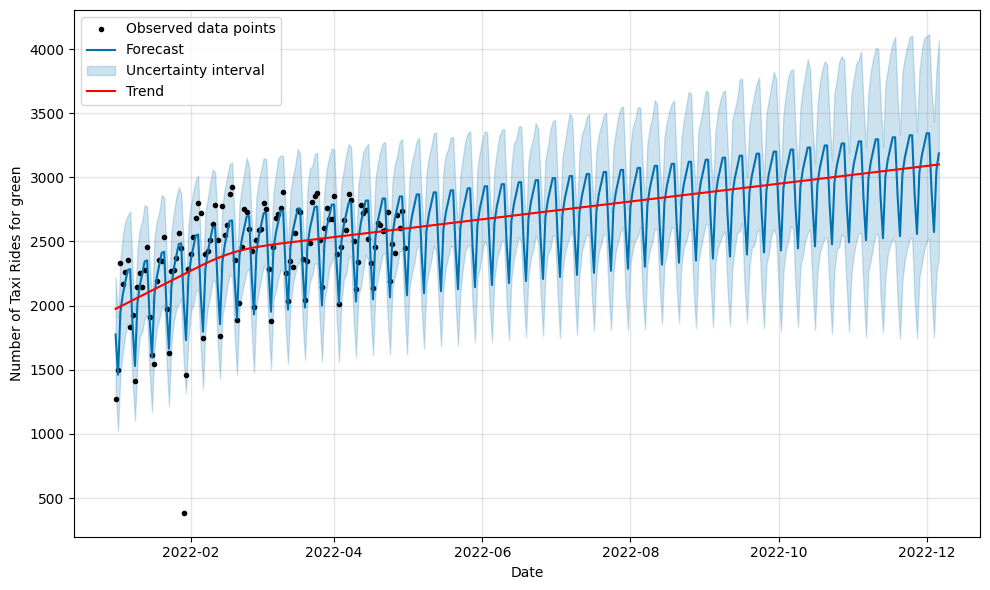

In [26]:
model_green.plot(forecast, xlabel='Date', ylabel='Number of Taxi Rides for green')
plt.plot(forecast['ds'], forecast['trend'], color='red', label='Trend')
plt.legend(loc='upper left')
plt.show()

In [27]:
"""import pandas as pd
from prophet import Prophet

df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

df_prophet = df_yellow[['tpep_pickup_datetime', 'trip_distance']].copy()
df_prophet = df_prophet.rename(columns={'tpep_pickup_datetime': 'ds', 'trip_distance': 'y'})


df_prophet = df_prophet.sort_values('ds')

# Adjust the fraction as needed
subset_size = int(len(df_prophet) * 0.1)
num_subsets = len(df_prophet) // subset_size

subset_dfs = [df_prophet[i * subset_size : (i+1) * subset_size] for i in range(num_subsets)]


# Train separate models on each subset
models = []
for subset_df in subset_dfs:
    m = Prophet(uncertainty_samples=10)  # Set the number of uncertainty samples
    m.fit(subset_df)
    models.append(m)

# Make forecasts using each model
forecasts = []
for model in models:
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    forecasts.append(forecast)

# Combine forecasts from all models
combined_forecast = pd.concat(forecasts)"""

"import pandas as pd\nfrom prophet import Prophet\n\ndf_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])\n\ndf_prophet = df_yellow[['tpep_pickup_datetime', 'trip_distance']].copy()\ndf_prophet = df_prophet.rename(columns={'tpep_pickup_datetime': 'ds', 'trip_distance': 'y'})\n\n\ndf_prophet = df_prophet.sort_values('ds')\n\n# Adjust the fraction as needed\nsubset_size = int(len(df_prophet) * 0.1)\nnum_subsets = len(df_prophet) // subset_size\n\nsubset_dfs = [df_prophet[i * subset_size : (i+1) * subset_size] for i in range(num_subsets)]\n\n\n# Train separate models on each subset\nmodels = []\nfor subset_df in subset_dfs:\n    m = Prophet(uncertainty_samples=10)  # Set the number of uncertainty samples\n    m.fit(subset_df)\n    models.append(m)\n\n# Make forecasts using each model\nforecasts = []\nfor model in models:\n    future = model.make_future_dataframe(periods=365)\n    forecast = model.predict(future)\n    forecasts.append(forecast)\n\n# Combine

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.